# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/Pewelix/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


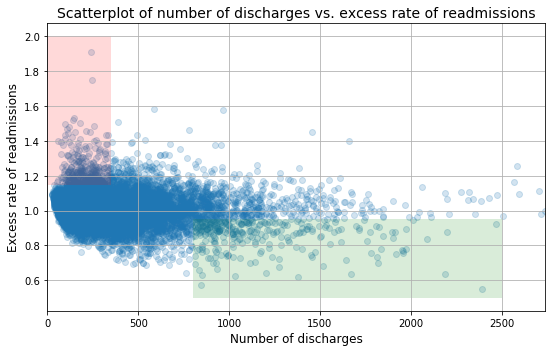

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

## A. Do you agree with the above analysis and recommendations? Why or why not?

Null Hypothesis: No correlation between excess readmission and number of discharges

Alternate Hypothesis: There is a correlation between excess readmission and number of discharges

Conduct bivariate pearson correlation test

In [6]:
import scipy.stats as stats
a, b = stats.pearsonr(x,y)

print('Pearson correlation coefficient: ', a)
print('p-value: ', b)

Pearson correlation coefficient:  -0.0930955428759
p-value:  1.50227564265e-23


There is a slightly negative correlation between the excess readmission rate and number of discharges.  

The p-value is below 0.05 suggesting the relationship is statistically significant and the null hypothesis should be rejected.  

Based on the information above, I agree with the conclusion that a correlation exists between hospital capacity (number of discharges) and readmission rates.  With that being said, I do not necessarily agree with the idea that smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.  We would need to dive into a number of other variables (location, prevelance of certain ailments in the area, management practices, overall experience, etc) before reaching that conclusion. 

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

    1. Setup an appropriate hypothesis test.
    2. Compute and report the observed significance value (or p-value).
    3. Report statistical significance for αα = .01.
    4. Discuss statistical significance and practical significance. Do 
    they differ here? How does this change your recommendation to the 
    client?
    
    Look at the scatterplot above.
        What are the advantages and disadvantages of using this plot to 
        convey information?
        Construct another plot that conveys the same information in 
        a more direct manner.


In [7]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [8]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


Null Hypothesis: No correlation between excess readmission rate and number of discharges in small hospitals (where number of discharges is <= 300).

Alternate Hypothesis: There is a correlation between excess readmission rate and number of discharges in small hospitals (where number of discharges is <= 300).

In [9]:
df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <= 300]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6213 entries, 16857 to 3835
Data columns (total 12 columns):
Hospital Name                 6213 non-null object
Provider Number               6213 non-null int64
State                         6213 non-null object
Measure Name                  6213 non-null object
Number of Discharges          6213 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      6132 non-null float64
Predicted Readmission Rate    6132 non-null float64
Expected Readmission Rate     6132 non-null float64
Number of Readmissions        6132 non-null float64
Start Date                    6213 non-null object
End Date                      6213 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 631.0+ KB


In [11]:
del df['Footnote']

In [12]:
df = df.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6132 entries, 1832 to 3835
Data columns (total 11 columns):
Hospital Name                 6132 non-null object
Provider Number               6132 non-null int64
State                         6132 non-null object
Measure Name                  6132 non-null object
Number of Discharges          6132 non-null int64
Excess Readmission Ratio      6132 non-null float64
Predicted Readmission Rate    6132 non-null float64
Expected Readmission Rate     6132 non-null float64
Number of Readmissions        6132 non-null float64
Start Date                    6132 non-null object
End Date                      6132 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 574.9+ KB


Slope:  -4.1911593476e-05
Intercept:  1.02138629444
R-value:  -0.0356920738208
P-value:  0.00518574863177


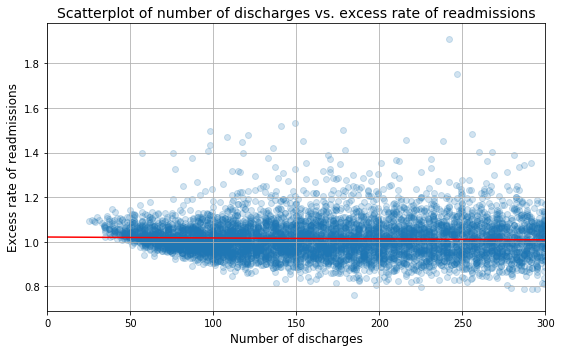

In [14]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in df['Number of Discharges']]
y = list(df['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(x,y)

print("Slope: ", slope)
print("Intercept: ", intercept)
print("R-value: ", r_value)
print("P-value: ", p_value)

x_1 = np.array([0, 300])
y_1 = slope * x_1 + intercept

ax.plot(x_1, y_1, color='r')

In [15]:
import scipy.stats as stats
a, b = stats.pearsonr(x,y)

print('Pearson correlation coefficient: ', a)
print('p-value: ', b)

Pearson correlation coefficient:  -0.0356920738208
p-value:  0.00518574863178


A slightly negative correlation is maintained in the smaller hospitals (number of discharges < 300) and the p-value is below 0.05 suggesting the relationship is statistically significant and the null hypothesis should be rejected.

Further, does the information vary by state?

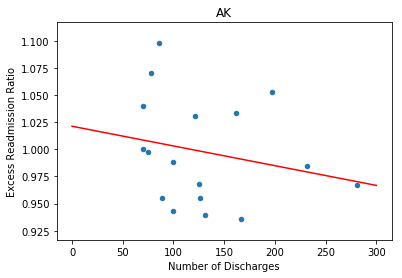

Slope:  -0.000181540747319
Intercept:  1.02125323833
P-value:  0.386392015088
Pearson Correlation Coefficient:  -0.224477715236


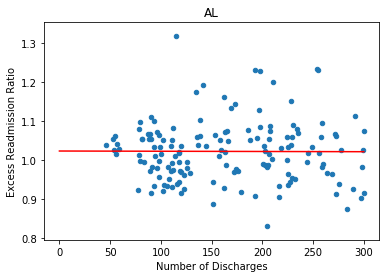

Slope:  -5.88509727769e-06
Intercept:  1.02370703167
P-value:  0.949459336651
Pearson Correlation Coefficient:  -0.00518402255962


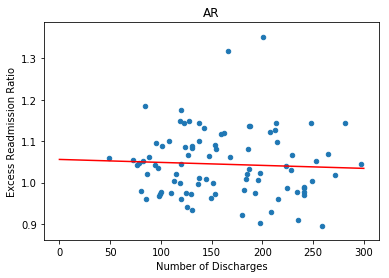

Slope:  -7.18392021705e-05
Intercept:  1.05592237534
P-value:  0.6306671571
Pearson Correlation Coefficient:  -0.0516596681819


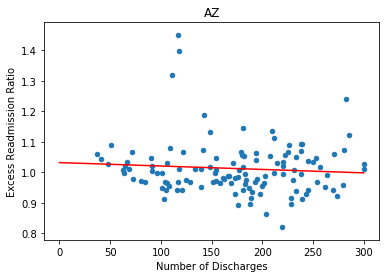

Slope:  -0.000112420893884
Intercept:  1.03153011545
P-value:  0.363841952012
Pearson Correlation Coefficient:  -0.082581018044


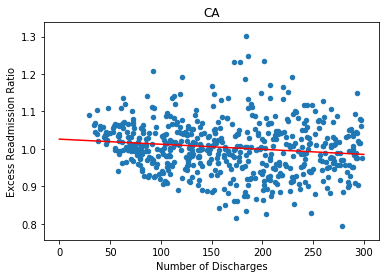

Slope:  -0.000135445101271
Intercept:  1.02620931506
P-value:  0.000816012686238
Pearson Correlation Coefficient:  -0.139577520916


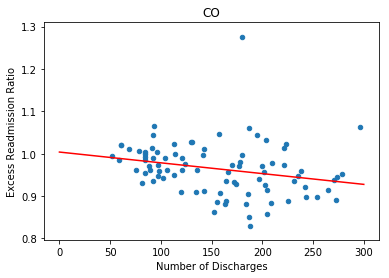

Slope:  -0.000254079325465
Intercept:  1.00390048535
P-value:  0.0175963465144
Pearson Correlation Coefficient:  -0.254004421137


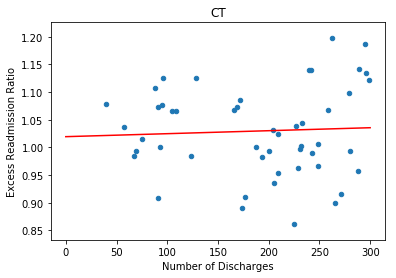

Slope:  5.38847019504e-05
Intercept:  1.01930761784
P-value:  0.72433470521
Pearson Correlation Coefficient:  0.0516821446943


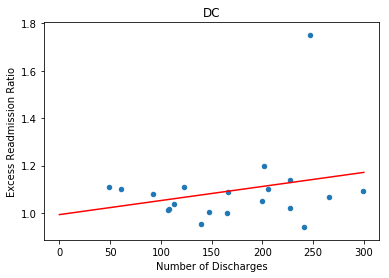

Slope:  0.000593026686635
Intercept:  0.993675581953
P-value:  0.288830136869
Pearson Correlation Coefficient:  0.249464968509


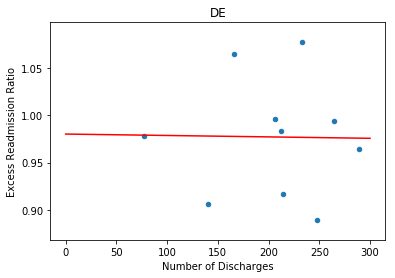

Slope:  -1.49293413376e-05
Intercept:  0.98019902204
P-value:  0.967142146031
Pearson Correlation Coefficient:  -0.0150241240936


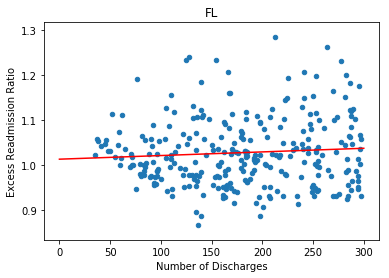

Slope:  8.08162008903e-05
Intercept:  1.01302665521
P-value:  0.190914290354
Pearson Correlation Coefficient:  0.0767541085251


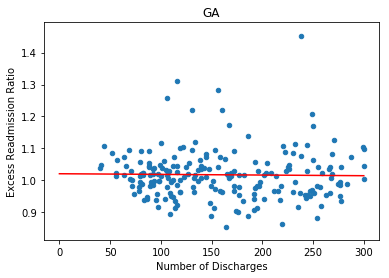

Slope:  -2.0571611862e-05
Intercept:  1.0210076303
P-value:  0.789965266173
Pearson Correlation Coefficient:  -0.0184006265061


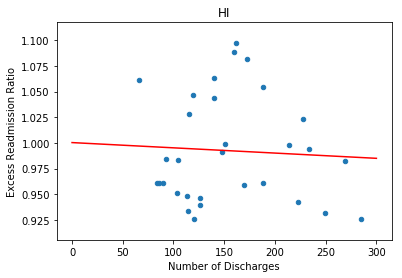

Slope:  -5.10635949097e-05
Intercept:  1.00030751355
P-value:  0.760924365851
Pearson Correlation Coefficient:  -0.0569437004607


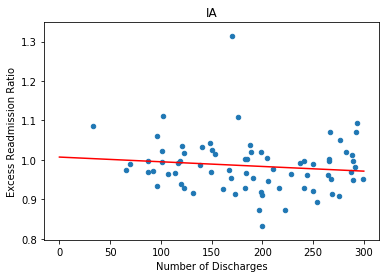

Slope:  -0.000118829528581
Intercept:  1.00718849344
P-value:  0.297621578849
Pearson Correlation Coefficient:  -0.12270820472


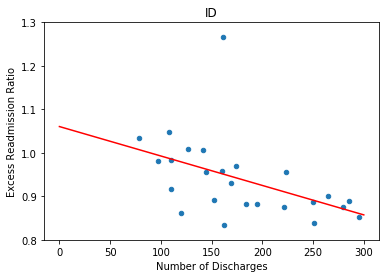

Slope:  -0.000677031866351
Intercept:  1.06060772878
P-value:  0.0170358096901
Pearson Correlation Coefficient:  -0.472650192697


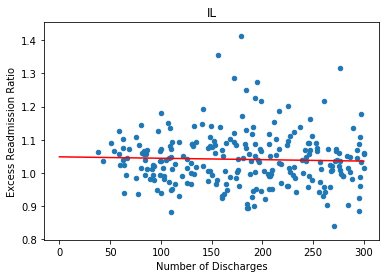

Slope:  -4.2800082076e-05
Intercept:  1.04859452975
P-value:  0.560416488308
Pearson Correlation Coefficient:  -0.0372219312061


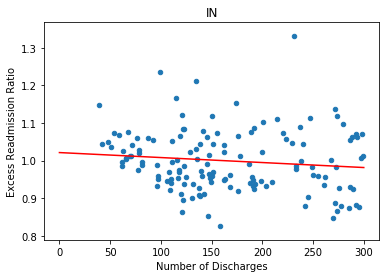

Slope:  -0.000132817590357
Intercept:  1.02128597398
P-value:  0.160991730511
Pearson Correlation Coefficient:  -0.118686949192


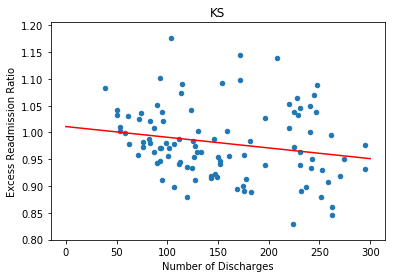

Slope:  -0.000199658350072
Intercept:  1.01104530085
P-value:  0.0399222124604
Pearson Correlation Coefficient:  -0.204812444745


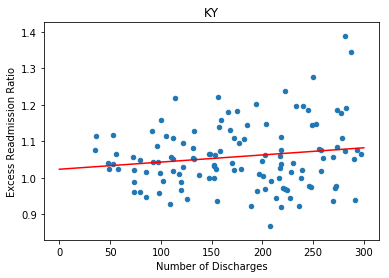

Slope:  0.000196122606385
Intercept:  1.02346632568
P-value:  0.0846079536853
Pearson Correlation Coefficient:  0.156780648097


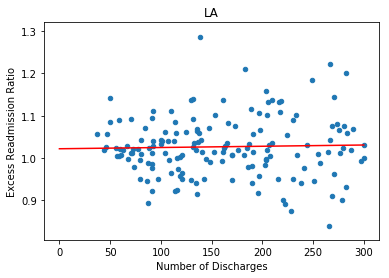

Slope:  2.95011876363e-05
Intercept:  1.0218614957
P-value:  0.704348918848
Pearson Correlation Coefficient:  0.0301333613353


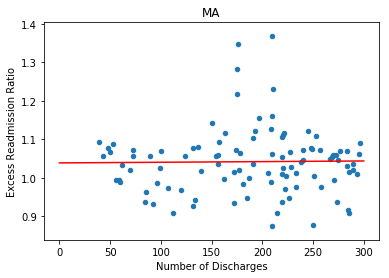

Slope:  1.68145059393e-05
Intercept:  1.03845402152
P-value:  0.885399439469
Pearson Correlation Coefficient:  0.0144481160774


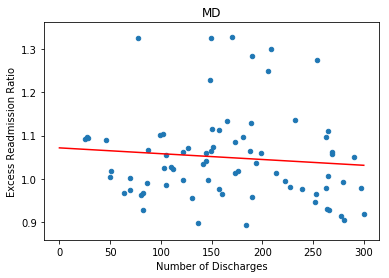

Slope:  -0.000134107768673
Intercept:  1.07157558799
P-value:  0.400018696864
Pearson Correlation Coefficient:  -0.0979273928938


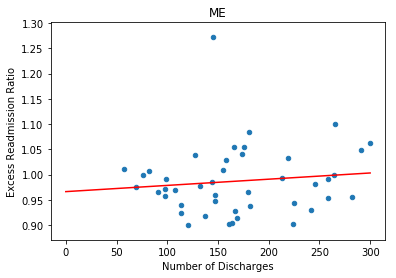

Slope:  0.000123065545014
Intercept:  0.966357689279
P-value:  0.446003385863
Pearson Correlation Coefficient:  0.117882302419


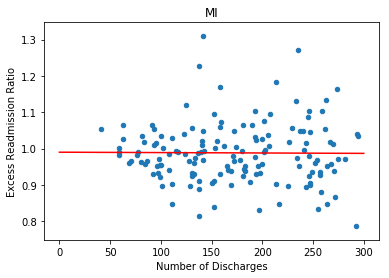

Slope:  -1.0828958425e-05
Intercept:  0.989912443586
P-value:  0.918447339692
Pearson Correlation Coefficient:  -0.00848820318896


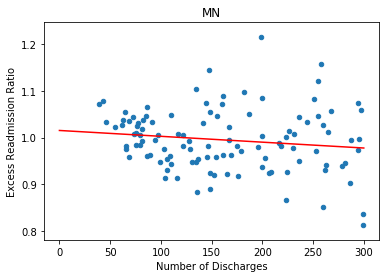

Slope:  -0.000125002305355
Intercept:  1.01506388607
P-value:  0.138144778066
Pearson Correlation Coefficient:  -0.141627795035


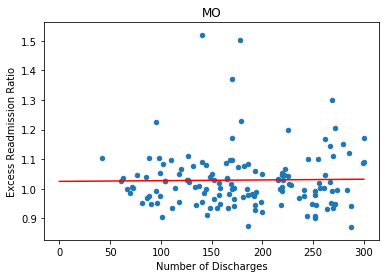

Slope:  2.43595555382e-05
Intercept:  1.0247730826
P-value:  0.851432582132
Pearson Correlation Coefficient:  0.0160295342474


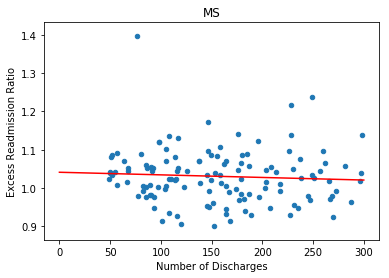

Slope:  -6.77622300989e-05
Intercept:  1.04120341718
P-value:  0.466463890558
Pearson Correlation Coefficient:  -0.0649373727984


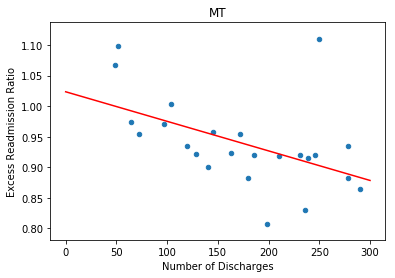

Slope:  -0.000483960772879
Intercept:  1.02351625294
P-value:  0.0136653065598
Pearson Correlation Coefficient:  -0.496164532404


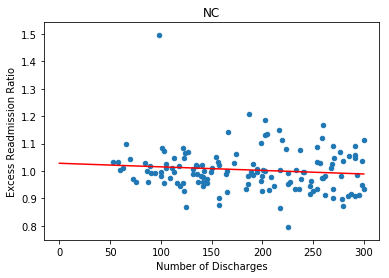

Slope:  -0.000129888322642
Intercept:  1.02820604814
P-value:  0.185148038773
Pearson Correlation Coefficient:  -0.113464855637


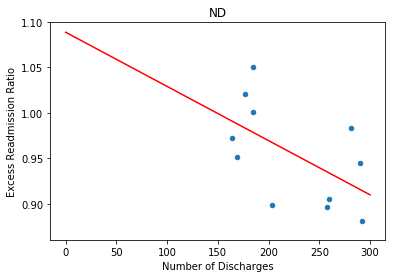

Slope:  -0.000595403363212
Intercept:  1.08859762609
P-value:  0.0771692215904
Pearson Correlation Coefficient:  -0.553743821761


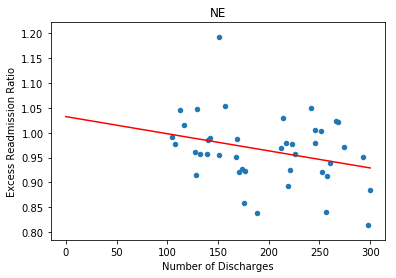

Slope:  -0.000344019636467
Intercept:  1.03234483526
P-value:  0.0575907851005
Pearson Correlation Coefficient:  -0.295331114021


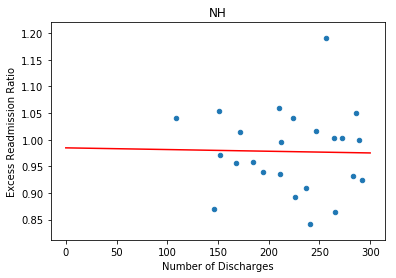

Slope:  -3.18404433561e-05
Intercept:  0.984662484427
P-value:  0.921732394414
Pearson Correlation Coefficient:  -0.0211842688652


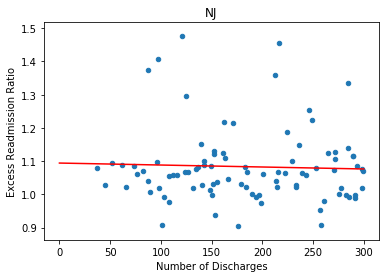

Slope:  -5.93227071755e-05
Intercept:  1.09428043613
P-value:  0.712072311003
Pearson Correlation Coefficient:  -0.0392167420153


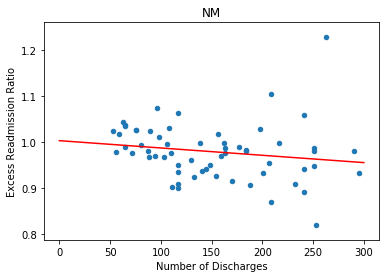

Slope:  -0.000158667567576
Intercept:  1.00286282362
P-value:  0.186260741393
Pearson Correlation Coefficient:  -0.171520338692


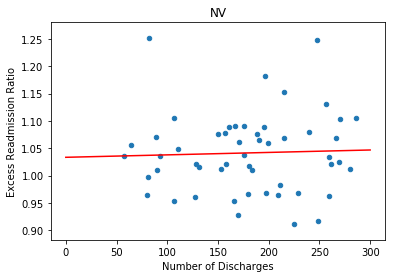

Slope:  4.45938008329e-05
Intercept:  1.03337069823
P-value:  0.786863138397
Pearson Correlation Coefficient:  0.0384158356719


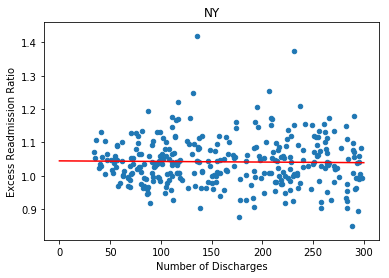

Slope:  -1.7812368534e-05
Intercept:  1.04475495891
P-value:  0.736492783471
Pearson Correlation Coefficient:  -0.0187946502225


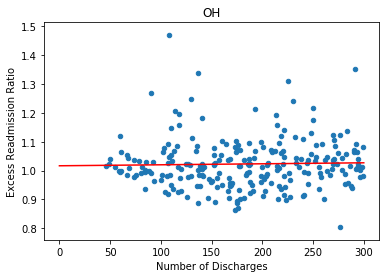

Slope:  3.43635928014e-05
Intercept:  1.01648331226
P-value:  0.676279401804
Pearson Correlation Coefficient:  0.0269756293982


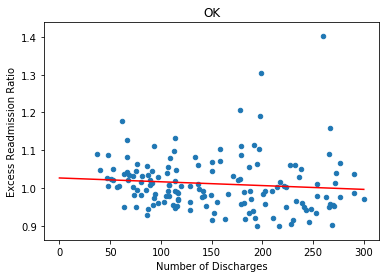

Slope:  -0.000100674759717
Intercept:  1.0265044672
P-value:  0.232196570866
Pearson Correlation Coefficient:  -0.0981337414826


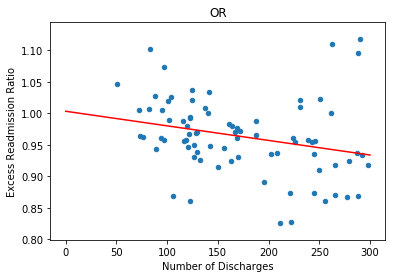

Slope:  -0.000231239145385
Intercept:  1.00308318006
P-value:  0.0198845513357
Pearson Correlation Coefficient:  -0.261569284582


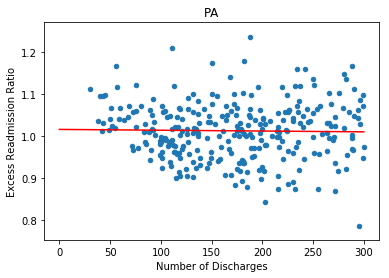

Slope:  -1.92333536085e-05
Intercept:  1.0153094243
P-value:  0.740727636433
Pearson Correlation Coefficient:  -0.0195129497189


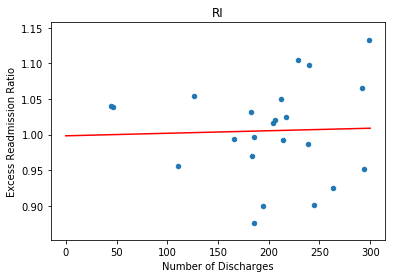

Slope:  3.54716655223e-05
Intercept:  0.998368209938
P-value:  0.870898370308
Pearson Correlation Coefficient:  0.0358771750481


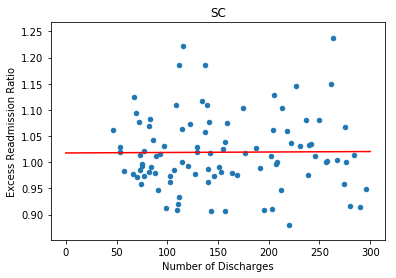

Slope:  8.94724283245e-06
Intercept:  1.01779089298
P-value:  0.931455301898
Pearson Correlation Coefficient:  0.00884792852663


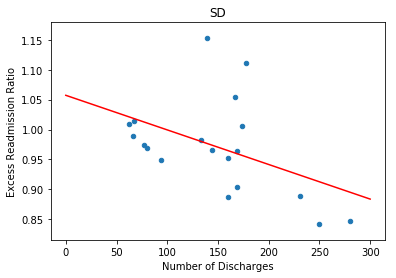

Slope:  -0.000578011039298
Intercept:  1.05722794263
P-value:  0.0505521200036
Pearson Correlation Coefficient:  -0.454560053338


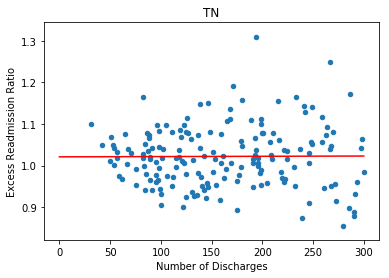

Slope:  6.48152818468e-06
Intercept:  1.02088071392
P-value:  0.935967053191
Pearson Correlation Coefficient:  0.00615266372075


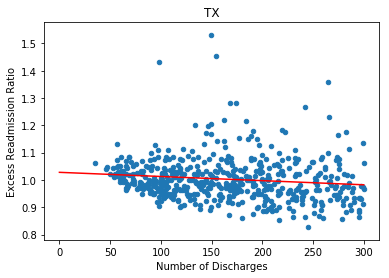

Slope:  -0.000152272094576
Intercept:  1.02789930516
P-value:  0.0030720201682
Pearson Correlation Coefficient:  -0.129094075297


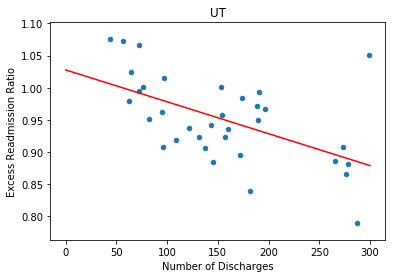

Slope:  -0.000495338807609
Intercept:  1.02766064116
P-value:  0.000787493310795
Pearson Correlation Coefficient:  -0.548299854716


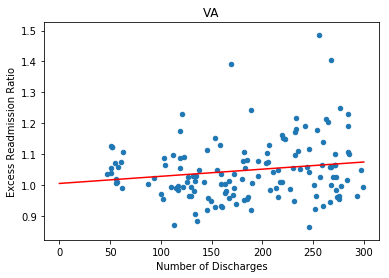

Slope:  0.000231628633744
Intercept:  1.0044694503
P-value:  0.0472036187322
Pearson Correlation Coefficient:  0.165671653114


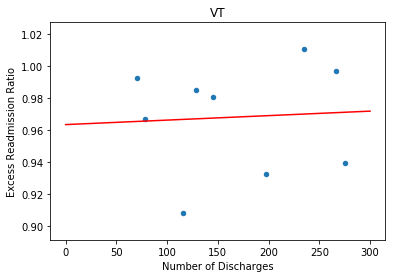

Slope:  2.80072045717e-05
Intercept:  0.963301013455
P-value:  0.870362863584
Pearson Correlation Coefficient:  0.0638520242667


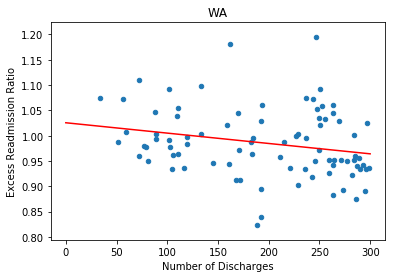

Slope:  -0.000204683268725
Intercept:  1.02555376895
P-value:  0.0312508517834
Pearson Correlation Coefficient:  -0.233832412398


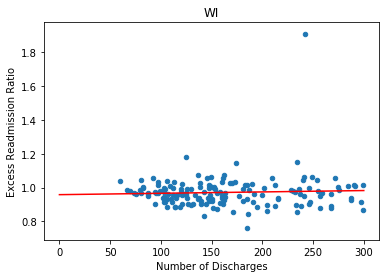

Slope:  8.10220352897e-05
Intercept:  0.958561175698
P-value:  0.52232481526
Pearson Correlation Coefficient:  0.0512706574622


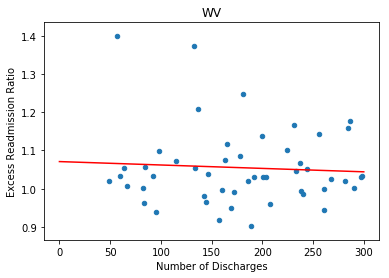

Slope:  -8.92805657338e-05
Intercept:  1.07097400832
P-value:  0.652515420635
Pearson Correlation Coefficient:  -0.0652605307348


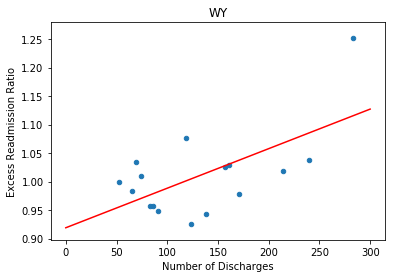

Slope:  0.000693676017689
Intercept:  0.919002403901
P-value:  0.011278747903
Pearson Correlation Coefficient:  0.6147101528


In [16]:
rejected_hypothesis=[]
accepted_hypothesis=[]

for (group, df_gp) in df.groupby('State'):
    x = [a for a in df_gp['Number of Discharges']]
    y = list(df_gp['Excess Readmission Ratio'])
    df_gp.plot(x='Number of Discharges', y='Excess Readmission Ratio', kind='scatter', title=group)
    
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    x_1 = np.array([0, 300])
    y_1 = slope * x_1 + intercept
    plt.plot(x_1, y_1, color='r')
    plt.show()
    print("Slope: ", slope)
    print("Intercept: ", intercept)

    c, d = stats.pearsonr(x,y)
    print('P-value: ', d)
    print('Pearson Correlation Coefficient: ', c)
    
    if d < 0.05:
        rejected_hypothesis.append(group)
    if d > 0.05:
        accepted_hypothesis.append(group)

In [17]:
print("States where null hypothesis is rejected: ", rejected_hypothesis)

States where null hypothesis is rejected:  ['CA', 'CO', 'ID', 'KS', 'MT', 'OR', 'TX', 'UT', 'VA', 'WA', 'WY']


In [18]:
print("States where null hypothesis is NOT rejected: ", accepted_hypothesis)

States where null hypothesis is NOT rejected:  ['AK', 'AL', 'AR', 'AZ', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'IL', 'IN', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'PA', 'RI', 'SC', 'SD', 'TN', 'VT', 'WI', 'WV']


I would recommend the client look specifically into how state policies and processes impact excess readmission ratios.

The scatter plot used in the original assessment is useful in showing the relationship between two continuous variables, excess readmission ratio and number of discharges.  Overplotting is a concern and it's difficult to visualize the negative correlation between the two variables.  With this particular case, breaking it down by State and adding a regression line would help as done above.  